In [128]:
import sys
import time
import numpy as np
import numba as nb
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [129]:
PathWindows = r"D:\Учеба\Практика\Диплом\gamma"
LibraryPathWindows = r"D:\Учеба\Практика\Диплом\gamma\SpectrumsMeasurementsLibrary"
LibraryPathLinux = r"/home/danis/work/python_works/gamma"
sys.path.insert(0, LibraryPathWindows)
sys.path.insert(0, PathWindows)
sys.path.insert(0, LibraryPathLinux)

In [130]:
from GammaRayInteractions.Materials import Material, R
from CrossSectionsLibrary.cross_sections_data import ENERGY_MESH
from MeasurementInstrumentation.measurement_techniques import ideal_transmission_function, \
k_edge_method_transmission_function, ross_method_transmission_function, edges_indices, open_detector
from NumericalMethods.simpson_rule import simpson_rule
from NumericalMethods.unfolding_technique import Gold

import matplotlib.ticker as mticker
from local_scripts import initialization_brem, generate_empty_matrix, complete_empty_matrix, integrate_the_row, get_integral_signals, apply_function_to_matrix

In [131]:
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"

In [132]:
font_properties = {'family' : 'Arial', 'weight' : 'regular', 'size' : 12}
rc('font', **font_properties)

Создание энергетических спектров

In [133]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

# список энергий пучков электронов
beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)
beams_energyes = np.array(beams_energyes)

In [9]:
# зарядовые числа материалов мишеней
z_numbers = np.array([10*i for i in range(1,10)])

Создание трехмерной матрицы спектров

In [105]:
def generate_empty_matrix(num_row, num_col):
    """
    Функция создает пустую матрицу заданных размеров
    """
    empty_matrix = [[i for i in range(num_col)] for j in range(num_row)]
    return empty_matrix

In [106]:
def complete_empty_matrix(empty_matrix, array_1, array_2, func):
    """
    Функция заполняет пустую матрицу заданными элементами из массивов
    array_1, array_2 по правилу, определяемому функцией fucn.
    Возвращает заполненную матрицу np.ndarray
    """
    for row, val_1 in enumerate(array_1):
        for col, val_2 in enumerate(array_2):
            empty_matrix[row][col] = func(val_1, val_2)
            
    return np.array(empty_matrix)

In [107]:
# создание матрицы со всеми сгенерированными спектрами
empty_bremsstrahlungs_matrix = generate_empty_matrix(len(z_numbers), len(beams_energyes))
bremsstrahlungs = complete_empty_matrix(empty_bremsstrahlungs_matrix, z_numbers, beams_energyes, initialization_brem)

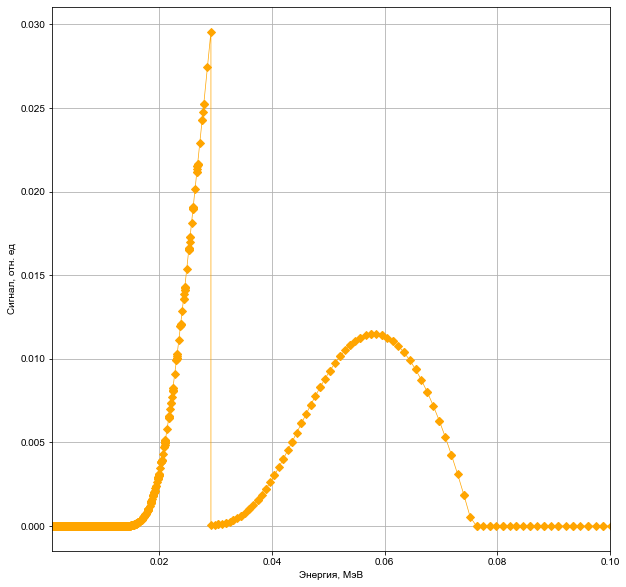

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ENERGY_MESH, bremsstrahlungs[4][15], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Сигнал, отн. ед')
ax.tick_params(axis='both')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 1e-1)
# ax.set_ylim(1e-15, 1.2)
ax.grid(True)

Инициализация измерительных каналов

In [13]:
first_channel = 11
last_channel = 100 
number_of_channels = last_channel - first_channel + 1

In [14]:
level = 0.1

In [15]:
# создание измерительных каналов
ROSS_METHOD_channels = [ross_method_transmission_function(num, num+1, level) for num in range(first_channel, last_channel)]
# создание канала с открытым детектором
channel_with_open_detector = open_detector()
# добавление канала с открытым детектором
ROSS_METHOD_channels.insert(0, channel_with_open_detector)

In [17]:
K = np.array(ROSS_METHOD_channels)

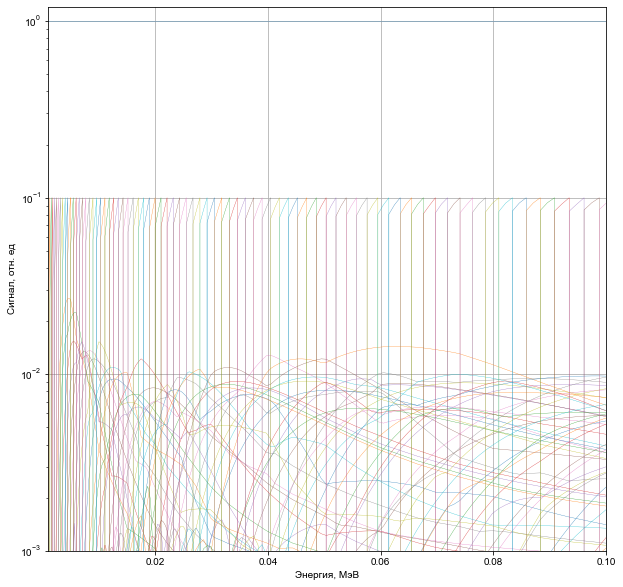

In [19]:
number_of_signals = fig, ax = plt.subplots(figsize=(10, 10))
for i in ROSS_METHOD_channels:
    ax.plot(ENERGY_MESH, i, ls='-', lw='0.3', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Сигнал, отн. ед')
ax.tick_params(axis='both')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-3, 1e-1)
ax.set_ylim(1e-3, 1.2)
ax.grid(True)

Создание матрицы с результатами измерения каждого спектра

In [20]:
empty_integral_signals_matrix = generate_empty_matrix(len(z_numbers), len(beams_energyes))

In [21]:
SIGNALS = apply_function_to_matrix(bremsstrahlungs, get_integral_signals, K)

Выполнено 1 из 50. Время: 0.3915 секунды
Выполнено 2 из 50. Время: 0.8043 секунды
Выполнено 3 из 50. Время: 1.1962 секунды
Выполнено 4 из 50. Время: 1.6119 секунды
Выполнено 5 из 50. Время: 2.0153 секунды
Выполнено 6 из 50. Время: 2.4125 секунды
Выполнено 7 из 50. Время: 2.8211 секунды
Выполнено 8 из 50. Время: 3.2312 секунды
Выполнено 9 из 50. Время: 3.6267 секунды
Выполнено 10 из 50. Время: 4.039 секунды
Выполнено 11 из 50. Время: 4.4618 секунды
Выполнено 12 из 50. Время: 4.8541 секунды
Выполнено 13 из 50. Время: 5.2632 секунды
Выполнено 14 из 50. Время: 5.6558 секунды
Выполнено 15 из 50. Время: 6.0635 секунды
Выполнено 16 из 50. Время: 6.4548 секунды
Выполнено 17 из 50. Время: 6.8546 секунды
Выполнено 18 из 50. Время: 7.2544 секунды
Выполнено 19 из 50. Время: 7.6397 секунды
Выполнено 20 из 50. Время: 8.0374 секунды
Выполнено 21 из 50. Время: 8.4428 секунды
Выполнено 22 из 50. Время: 8.8391 секунды
Выполнено 23 из 50. Время: 9.2377 секунды
Выполнено 24 из 50. Время: 9.6226 секунды
Вы

Выполнено 40 из 50. Время: 77.4225 секунды
Выполнено 41 из 50. Время: 77.825 секунды
Выполнено 42 из 50. Время: 78.2412 секунды
Выполнено 43 из 50. Время: 78.6462 секунды
Выполнено 44 из 50. Время: 79.0792 секунды
Выполнено 45 из 50. Время: 79.528 секунды
Выполнено 46 из 50. Время: 79.9537 секунды
Выполнено 47 из 50. Время: 80.3751 секунды
Выполнено 48 из 50. Время: 80.7911 секунды
Выполнено 49 из 50. Время: 81.1959 секунды
Выполнено 50 из 50. Время: 81.6129 секунды
ВЫПОЛНЕНО 4 из 9 СТОЛБЦОВ. Время: 81.6129 секунды
Выполнено 1 из 50. Время: 82.0121 секунды
Выполнено 2 из 50. Время: 82.4196 секунды
Выполнено 3 из 50. Время: 82.839 секунды
Выполнено 4 из 50. Время: 83.2636 секунды
Выполнено 5 из 50. Время: 83.6627 секунды
Выполнено 6 из 50. Время: 84.0931 секунды
Выполнено 7 из 50. Время: 84.503 секунды
Выполнено 8 из 50. Время: 84.9256 секунды
Выполнено 9 из 50. Время: 85.3348 секунды
Выполнено 10 из 50. Время: 85.7422 секунды
Выполнено 11 из 50. Время: 86.148 секунды
Выполнено 12 из 50

Выполнено 25 из 50. Время: 152.4383 секунды
Выполнено 26 из 50. Время: 152.8382 секунды
Выполнено 27 из 50. Время: 153.2381 секунды
Выполнено 28 из 50. Время: 153.6221 секунды
Выполнено 29 из 50. Время: 154.0212 секунды
Выполнено 30 из 50. Время: 154.4216 секунды
Выполнено 31 из 50. Время: 154.806 секунды
Выполнено 32 из 50. Время: 155.2047 секунды
Выполнено 33 из 50. Время: 155.6031 секунды
Выполнено 34 из 50. Время: 156.0028 секунды
Выполнено 35 из 50. Время: 156.4038 секунды
Выполнено 36 из 50. Время: 156.8049 секунды
Выполнено 37 из 50. Время: 157.189 секунды
Выполнено 38 из 50. Время: 157.5889 секунды
Выполнено 39 из 50. Время: 157.9728 секунды
Выполнено 40 из 50. Время: 158.3711 секунды
Выполнено 41 из 50. Время: 158.771 секунды
Выполнено 42 из 50. Время: 159.1708 секунды
Выполнено 43 из 50. Время: 159.5715 секунды
Выполнено 44 из 50. Время: 159.9714 секунды
Выполнено 45 из 50. Время: 160.3555 секунды
Выполнено 46 из 50. Время: 160.7602 секунды
Выполнено 47 из 50. Время: 161.1391

In [134]:
# вычисление среднего значение энергии в полосах пропускания измерительных каналов
left_bounds = [Material(i).k_edge_energy() for i in range(11, 100)]
right_bounds = [val for val in left_bounds]
mean_energy_in_pass_band = (np.array(right_bounds) + np.array(left_bounds)) / 2

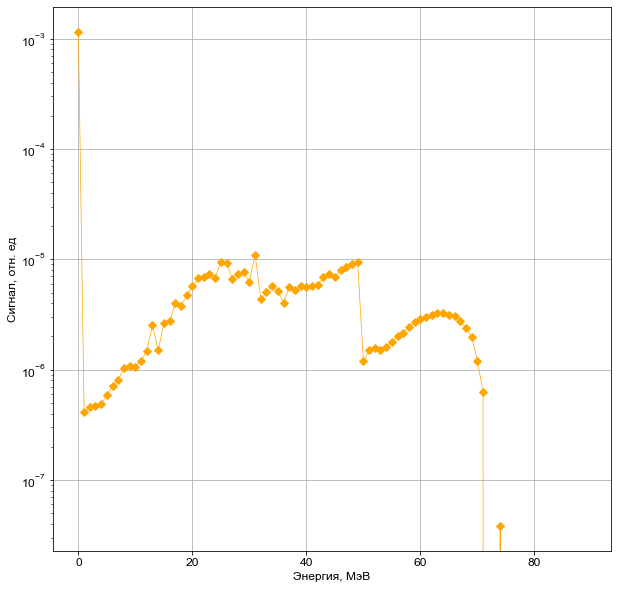

In [135]:
number_of_signals = len(ROSS_METHOD_channels)
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(range(number_of_signals), SIGNALS[5][20], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Сигнал, отн. ед')
ax.tick_params(axis='both')
# ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(1e-3, 1e+2)
# ax.set_ylim(1e-15, 1.2)
ax.grid(True)

Динамический диапазон

In [26]:
axis1_energy, axis_z = np.meshgrid(beams_energyes, z_numbers)

In [64]:
axis_channels, axis2_energy = np.meshgrid([i for i in range(first_channel+1, last_channel+1)], beams_energyes)

In [60]:
SIGNALS.shape

(9, 50, 90)

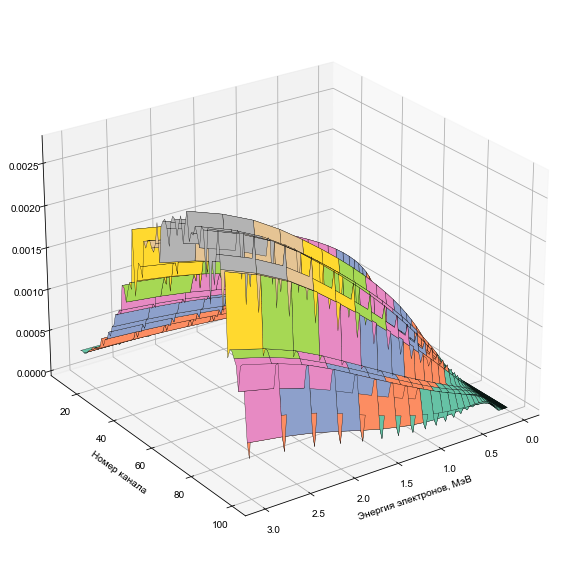

In [75]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(axis2_energy, axis_channels, SIGNALS[0,:,1:], cmap=cm.Set2, linewidth=0.3, edgecolors='k', shade=True)

ax.set_xlabel('Энергия электронов, МэВ')
ax.set_ylabel('Номер канала')
# ax.set_zlabel('Ср.кв. ошибка восстановления, отн. ед.')
fig.tight_layout()

# ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
# ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# угол зрения (линейный)
# ax.view_init(elev=20, azim=-135)

# угол зрения (логарифм)
ax.view_init(elev=25, azim=55)
fig.tight_layout()
# fig.savefig('Фильтрационные_кривые_Р_пропускание_01_z10.jpg', bbox_inches='tight')

Восстановление спектра

In [136]:
# создание матрицы задачи
Matrix = np.array([simpson_rule(r, regime='c', function_jumps=[Material(60).k_edge_index()]) for r in ROSS_METHOD_channels])
new_mesh = np.array(simpson_rule(ROSS_METHOD_channels[0], regime='m', function_jumps=[Material(60).k_edge_index()]))

In [137]:
z_example = 5
en_example = 15

In [138]:
signals_simpson = SIGNALS[z_example][en_example]
brem = bremsstrahlungs[z_example][en_example]
bound_100_kev = Material(100).k_edge_index()

In [164]:
def get_deviation(initial_mesh, initial_spectrum, deconvolved_mesh, deconvolved_spectrum):
    """
    Возвращает ошибку восстановления спектра
    """
    deconvolved_spectrum_on_initial_mesh = np.interp(initial_mesh, deconvolved_mesh, deconvolved_spectrum)
    unfolding_deviation = (initial_spectrum - deconvolved_spectrum_on_initial_mesh)**2

    return simpson_rule(unfolding_deviation) / simpson_rule(initial_spectrum**2)


def get_deviation_up_to_bound(initial_mesh, initial_spectrum, deconvolved_mesh, deconvolved_spectrum, bound):
    """
    Возвращает ошибки восстановления спектра в области до К скачка 100 элемента таблицы Менделеева
    """
    deconvolved_spectrum_on_initial_mesh = np.interp(initial_mesh, deconvolved_mesh, deconvolved_spectrum)
    initial_spectrum_up_to_bound = np.copy(initial_spectrum)
    deconvolved_spectrum_up_to_bound = np.copy(deconvolved_spectrum_on_initial_mesh)
    initial_spectrum_up_to_bound[bound:] = 0 # зануление части, лежащей выше требуемого К скачка
    deconvolved_spectrum_up_to_bound[bound:] = 0 # зануление части, лежащей выше требуемого К скачка
    unfolding_deviation = (initial_spectrum_up_to_bound - deconvolved_spectrum_up_to_bound)**2

    return simpson_rule(unfolding_deviation) / simpson_rule(initial_spectrum_up_to_bound**2)

def Gold(matrix, results, weight, initial_mesh, deconvolved_mesh, initial_spectrum, iteration_number, bound, journal=False, wmode='value'):
    A, b = matrix, results
    if wmode == "value":
        W = np.diag([float(val**weight) for i,val in enumerate(b)])
    if wmode == "channel":
        W = np.diag([float(i**weight) for i,val in enumerate(b)])
    previous_x = np.ones((A.shape[1])) # начальное приближение
    current_x = np.ones((A.shape[1])) # текущее значение

    signals_deviation = np.empty(iteration_number) # пустой массив под запись отклонения сигналов на каждой итерации
    unfolding_deviation = np.empty(iteration_number) # пустой массив под запись ошибки восстановления спектра
    unfolding_deviation_up_to_100_kev = np.empty(iteration_number) # пустой массив под запись ошибки восстановления спектра до 100 кэв

    bound_100_kev = bound

    if journal == False:
        # Основной цикл алгоритма Голда
        for k in range(0, iteration_number + 1):
            # Создание матрицы Y = A.T * W.T * W * b
            Y = np.dot(A.T, np.dot(W.T, np.dot(W, b)))
            # Создание матрицы AX = A.T * W.T * W * A * x
            AX = np.dot(A.T, np.dot(W.T, np.dot(W, np.dot(A, previous_x))))
            AX[AX == 0] = np.nextafter(0, 1)*1e20
            current_x = previous_x + (previous_x / AX) * (Y - AX)
            previous_x = current_x

        unfolding_deviation = get_deviation(initial_mesh, initial_spectrum, deconvolved_mesh, current_x)
        unfolding_deviation_up_to_100_kev = get_deviation_up_to_bound(initial_mesh, initial_spectrum, deconvolved_mesh, current_x, bound_100_kev)
        signals_deviation = np.linalg.norm(np.dot(A, current_x) - b)

        return current_x, unfolding_deviation, unfolding_deviation_up_to_100_kev, signals_deviation


    if journal == True:

        # Основной цикл алгоритма Голда
        for k in range(0, iteration_number):
            # Создание матрицы Y = A.T * W.T * W * b
            Y = np.dot(A.T, np.dot(W.T, np.dot(W, b)))
            # Создание матрицы AX = A.T * W.T * W * A * x
            AX = np.dot(A.T, np.dot(W.T, np.dot(W, np.dot(A, previous_x))))
            AX[AX == 0] = np.nextafter(0, 1)*1e20
            current_x = previous_x + (previous_x / AX) * (Y - AX)
            previous_x = current_x

            signals_deviation[k] = np.linalg.norm(np.dot(A, current_x) - b)
            unfolding_deviation[k] = get_deviation(initial_mesh, initial_spectrum, deconvolved_mesh, current_x)

    return current_x, [list(range(iteration_number)), signals_deviation, unfolding_deviation]

In [168]:
result = Gold(Matrix, signals_simpson, 2, ENERGY_MESH, new_mesh, brem, iteration_number=10000, bound=bound_100_kev, journal=False, wmode='channel')

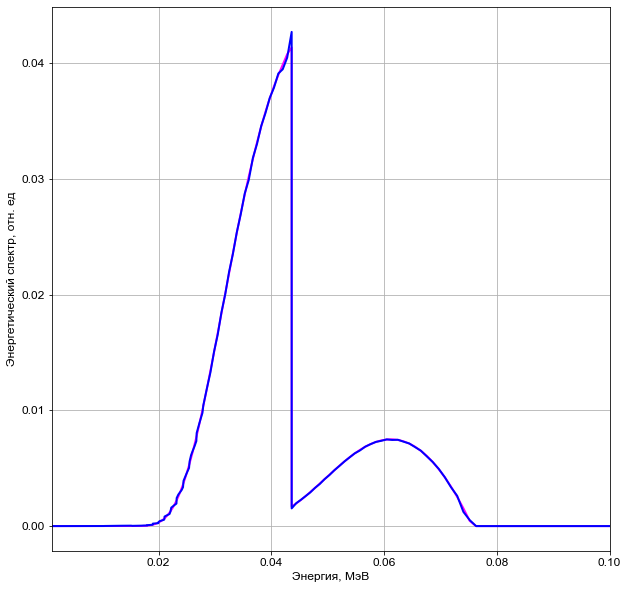

In [169]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ENERGY_MESH, brem, ls='-', lw='2', ms=5, color='magenta')
ax.plot(new_mesh, result[0], ls='-', lw='2', ms=5, color='blue')


# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-3, 1.2)
ax.grid(True)

#

Сохранение результатов

In [76]:
ROSS_METHOD_SIGNALS = np.save('СИГНАЛЫ_Р_пропускание_01.npy', SIGNALS)